# Image processing using Python
We will straight away jump into image processing in Python. The other essential Python features will be discussed as and when required.

I will be using only `skimage` library as it is easier, although users are encouraged to also explore `opencv` library.

## Import important libraries

In [1]:
# for basic OS operations like file handling etc.
import sys
import os
import glob
import re

# to suppresss unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# for using arrays
import numpy as np

# for plotting
import matplotlib 
matplotlib.rcParams["savefig.directory"] = ""
import matplotlib.pyplot as plt

# for working with tables
import pandas as pd

# for image processing
from skimage import data, io, filters
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

from skimage.filters import threshold_minimum
from skimage.filters import threshold_local
from skimage.filters import threshold_otsu
#from skimage.filters import threshold_multiotsu

from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import binary_closing
from skimage.morphology import disk
from skimage.morphology import remove_small_objects

from skimage import measure

## Reading, displaying and saving an image
The file name which is stored on the hard disk is always a `string` data type. Lets save it in a variable called `fname`.

In [2]:
fname = "img_1.png"
print(fname)
display(fname)

img_1.png


'img_1.png'

In [3]:
type(fname)

str

In the above lines, `print()` and `display()` functions are used to output text. They both function similarly.

The function `type()` gives the datatype of the `variable` `fname`, and is of type `str` or `string`.

In [4]:
# load the image
img_original = io.imread(fname)

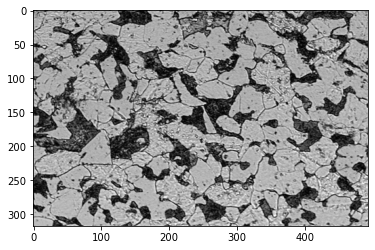

In [5]:
# display the image
plt.imshow(img_original)

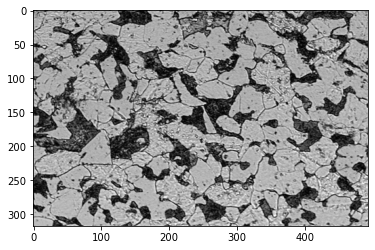

In [6]:
# display the image using matplotlib's plt
plt.imshow(img_original)

If one wants to view the image interactively with options for zooming etc., use the `%matplotlib notebook` environment

<IPython.core.display.Javascript object>


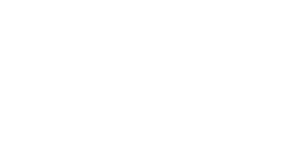

In [7]:
%matplotlib notebook
plt.imshow(img_original)

To switch back to the `inline` environment use `%matplotlib inline`

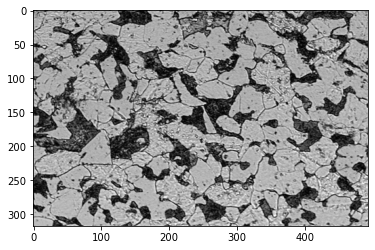

In [8]:
%matplotlib inline
plt.imshow(img_original)

The image can be saved with the download image button in the interactive environment. To save the image using code...

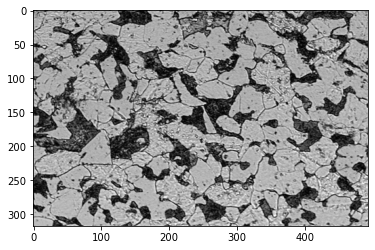

In [9]:
fname_save = 'img_1_color_dpi_300.png' # append the file extension to the file name, it can also be .jpg, .tif etc.
plt.imshow(img_original)
plt.savefig(fname_save, dpi=300) # the dpi argument specifies the resolution of the image

## Understanding images in skimage
Now, we will understand how images are represented and stored in skimage.

In [10]:
# examine the type of the data structure in which the image is stored
type(img_original)

numpy.ndarray

The data structure of the image is `numpy.ndarray`. Now examine the size and shape of the image. This will give an idea about the image format, like is it RGB or only grayscale.

In [11]:
np.shape(img_original)

(318, 494, 3)

The shape of the image is `(318, 494, 3)`, where the last dimension 3 represents that the image has 3 channels represented by RGB colors. 318X494 is the size of the image in pixels.

In summary, all images are saved as arrays of size heightXwidthXchannels.

For further processing, we need to convert the image to black and white, i.e. remove the 3 color channels. This is done by the function rgb2gray().

In [12]:
X = rgb2gray(img_original)
np.shape(X)

(318, 494)

## Grayscale to Binary image
We can also make this image from gray scale to binary (i.e. only black and white (BW)). This BW image is useful in applying certain filters and image processing algorithms. Thresholding (conversion of grayscale to BW image) is done in the following ways:

### Manual threshold
The threshold value is manually set by trial and error. White represents 1, and black represents 0. Set a value of `thresh_manual` between 0 and 1. Higher value of `thresh_manual` results in blacker images.

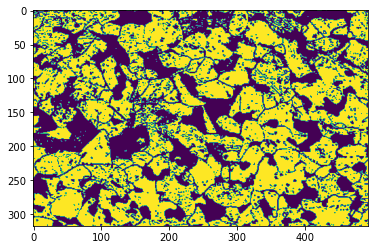

In [13]:
thresh_manual = 0.6
binary_X = X > thresh_manual
plt.imshow(binary_X)

Although it is a binary image, `plt.imshow` renders it in color. It is because the default color palette is `viridis` which is colorful. We can impose the `gray` color palette to render the image in black and white as displayed below.

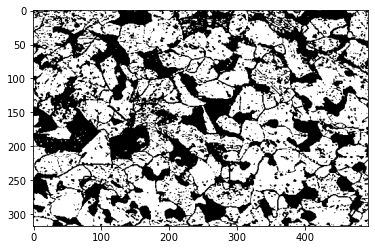

In [14]:
plt.imshow(binary_X, cmap='gray')

### Automatic Threshold
The threshold value is automatically set by using the Otsu algorithm. It statistically segments the image into black and white regions by looking at the histogram of the pixel values.

In [15]:
thresh_otsu = threshold_otsu(X) # remember we have imported threshold_otsu() function at the beginning of the code
display(thresh_otsu) # prints the value of thresh_otsu

0.439453125

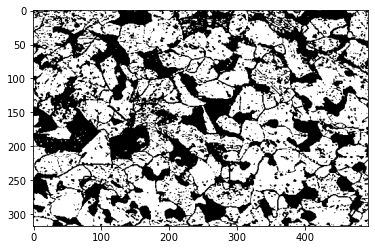

In [16]:
plt.imshow(binary_X, cmap='gray')

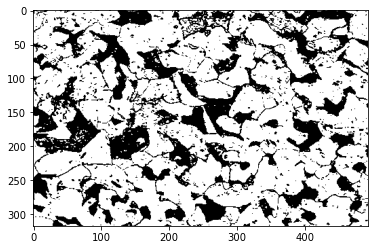

In [17]:
# use thresh_otsu to convert to binary
binary_X = X > thresh_otsu
plt.imshow(binary_X, cmap='gray')

### Adaptive Threshold
This threshold value is automatically generated **locally** based upon the local conditions. Unlike Otsu there is no single threshold value for the entire image. It is beneficial when the image has changing brightness value across different regions of the image. The size of the local region to be considered is given in `block_size` in pixels.

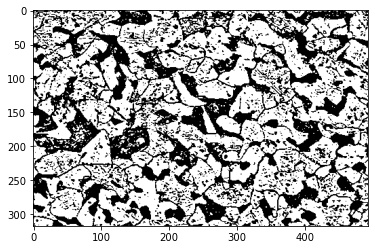

In [18]:
thresh_local = threshold_local(X, block_size=49)
# use thresh_local to convert to binary
binary_X = X > thresh_local
plt.imshow(binary_X, cmap='gray')

## Remove small noise areas
From using different thresholding algorithms, we see that for this particular image Otsu gives the best results, i.e. it is able to separrate the pearlite (black+white) phase from the austenite (white phase). In order to find the amount of pearlite in the microstructure, we further have to clean the image. Here, we first remove specks of white dots in the black phase and then remove specks of black dots from the white phase. 

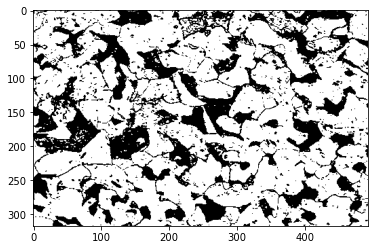

In [19]:
# use thresh_otsu to convert to binary
binary_X = X > thresh_otsu
plt.imshow(binary_X, cmap='gray')

### Remove white specks from black phase

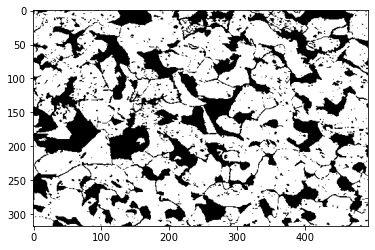

In [20]:
binary_rm = remove_small_objects(binary_X, min_size=28)
plt.imshow(binary_rm, cmap='gray')

### Remove black specks from white phase

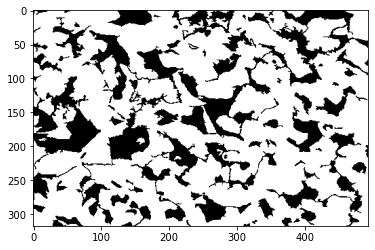

In [21]:
binary_rm_2 = ~remove_small_objects(~binary_rm, min_size=20) # we are taking complements of the image, 
# because the algorithm is only designed to remove whie foreground on black background, 
# and here we are doing the reverse.
plt.imshow(binary_rm_2, cmap='gray')

The operations that we performed above can also be done using the morphological filters `opening` and `closing`. Great example of the visual meaning of these can be read at https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html#sphx-glr-auto-examples-applications-plot-morphology-py

In short, `opening` can remove small bright spots (i.e. “salt”) and connect small dark cracks. On the contrary,  `closing` can remove small dark spots (i.e. “pepper”) and connect small bright cracks. We apply these to our noisy image `binary_X` ...

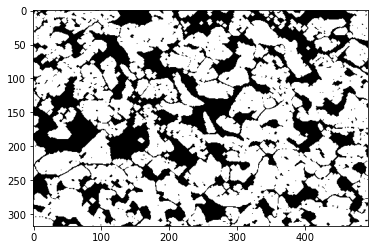

In [22]:
footprint = disk(2)
opened = opening(binary_X, footprint)
plt.imshow(opened, cmap='gray')

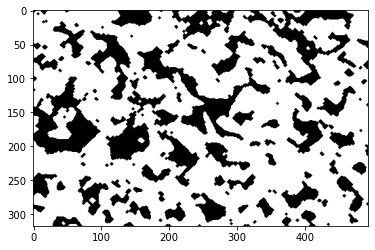

In [23]:
footprint = disk(2)
closed = closing(opened, footprint)
plt.imshow(closed, cmap='gray')

One has to be very careful while applying these filters, as they can distort the features of the image. One thing to keep in mind is the feature we want to retrieve from the image. If our objective is to calculate the number and shape of pearlite grains, then we should be cautious that we don't drastically change pearlite features. 

## Obtaining statistics: Area fraction
Now the image is cleaned, we can obtain some statistics like the approximate phase fraction.

In [24]:
img_area = np.shape(binary_rm_2)[0]*np.shape(binary_rm_2)[1]
area_fraction = np.sum(binary_rm_2)/img_area
print("area fraction of white phase = ", area_fraction)

area fraction of white phase =  0.7189735950907749


## Number and distribution of minority phase
We will use image segmentation to identify independent (disconnected) clusters of minority phases. Using this, we will be able to generate statistics like number and shape of minority phase. 

First we identify the different clusters of minority phase and label and color them for easy identification.

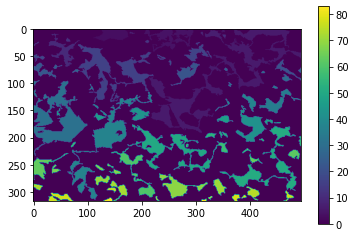

In [25]:
image_labels, count_labels = measure.label(~binary_rm_2, background=0, return_num=True)
plt.imshow(image_labels)
plt.colorbar()
plt.show()

To change the color scheme of the labels

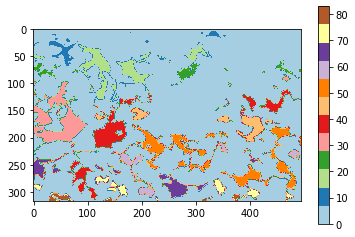

In [26]:
image_labels_thresholded = np.copy(image_labels)
cmap_c=plt.get_cmap('Paired') # designing our custom color map based on 'Paired' colormap
plt.imshow(image_labels_thresholded, cmap=cmap_c)
plt.colorbar()

In [27]:
type(image_labels)

numpy.ndarray

In [28]:
display(np.max(image_labels))
display(count_labels)

83

83

`image_labels` is again a 2D array, numpy.ndarray (like any image). But, instead of just 0 & 1, it has data ranging from 0 (the matrix phase) to the maximum number of clusters (count_labels). 

Let us analyze each of the cluster in image_labels. For this we use `measure.regionprops()` function.

In [29]:
properties = measure.regionprops(image_labels)

In [30]:
type(properties)

list

In [31]:
len(properties) # gives the length of a list

83

So `properties` is of type `list`, and has `count_labels` elements in it. Lists are a built in python data structure, similar to numpy arrays. Lists are more versatile, unlike arrays they can store any type of elements. 

Now, we will see what is contained in these lists.

In [32]:
type(properties[0]) # accessing the 0th element of the list

skimage.measure._regionprops.RegionProperties

The dir() function in python can be used to display all the methods/functions and attributes of an object. 

In [33]:
dir(properties[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_cache_active',
 '_extra_properties',
 '_intensity_image',
 '_intensity_image_double',
 '_label_image',
 '_multichannel',
 '_ndim',
 '_slice',
 '_spatial_axes',
 'area',
 'bbox',
 'bbox_area',
 'centroid',
 'convex_area',
 'convex_image',
 'coords',
 'eccentricity',
 'equivalent_diameter',
 'euler_number',
 'extent',
 'feret_diameter_max',
 'filled_area',
 'filled_image',
 'image',
 'inertia_tensor',
 'inertia_tensor_eigvals',
 'intensity_image',
 'label',
 'local_centroid',
 'major_axis_length',
 'max_intensity',
 'mean_intensity',
 'min_intensity',
 'minor_axis_le

The variables that start with `_` are private (simply means not of any use to us, only to code developers and experts). Also there are various other variables, which we can look online, or browse the regionprops documentation page.

For example some of the variables...

In [34]:
display(properties[0].centroid)
display(properties[0].perimeter)
display(properties[0].area)
display(properties[0].eccentricity)

(1.64, 9.626666666666667)

53.692388155425114

75

0.9672423810901406

Now lets collect the basic properties like area and perimeter for all the clusters in a `list`. We will go over all the elements of the list and save them to another list, using one line command below. This small one line command is called as list comprehension. Below we create two lists, one of areas and the other of perimeters of all the clusters. We can check the length of each of the lists and it should be equal to count_labels.

In [35]:
areas = [prop.area for prop in properties]
perimeters = [prop.perimeter for prop in properties]
display(len(areas))
display(len(perimeters))

83

83

In [36]:
important_props = measure.regionprops_table(image_labels, properties=('centroid', 'perimeter', 'area'))

We can use `pandas` library to display the properties we stored in `important_props`...

In [37]:
df = pd.DataFrame(important_props)
df

,centroid-0,centroid-1,perimeter,area
0,1.640000,9.626667,53.692388,75
1,1.280000,49.400000,18.242641,25
2,10.817669,146.899436,167.189863,1064
3,15.633033,254.303985,598.079257,1556
4,4.321429,350.678571,23.828427,28
...,...,...,...,...
78,309.593750,388.750000,21.485281,32
79,313.208333,228.125000,19.071068,24
80,311.291667,326.375000,19.278175,24
81,315.338983,139.491525,33.485281,59


This table can be output to any text file, excel file etc for further analysis outside of Python. Here, we output it to a csv file...

In [38]:
df.to_csv('cluster_properties.csv')

We can also do some statistical analysis like plotting histograms etc...

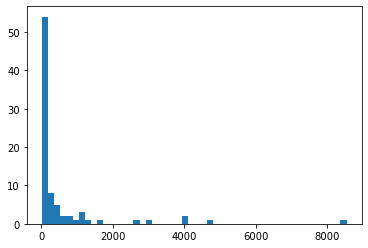

In [39]:
n, bins, patches = plt.hist(df['area'], bins=50)

This concludes the basic knowledge required to initiate oneself with image processing in Python. With this, one is sufficiently armed to explore more features per relevance.